# Regularization ( Ridge L2, Lasso L1)
Purpose of regularization is to achieve low bias and variance 


To reduce multicollinearity

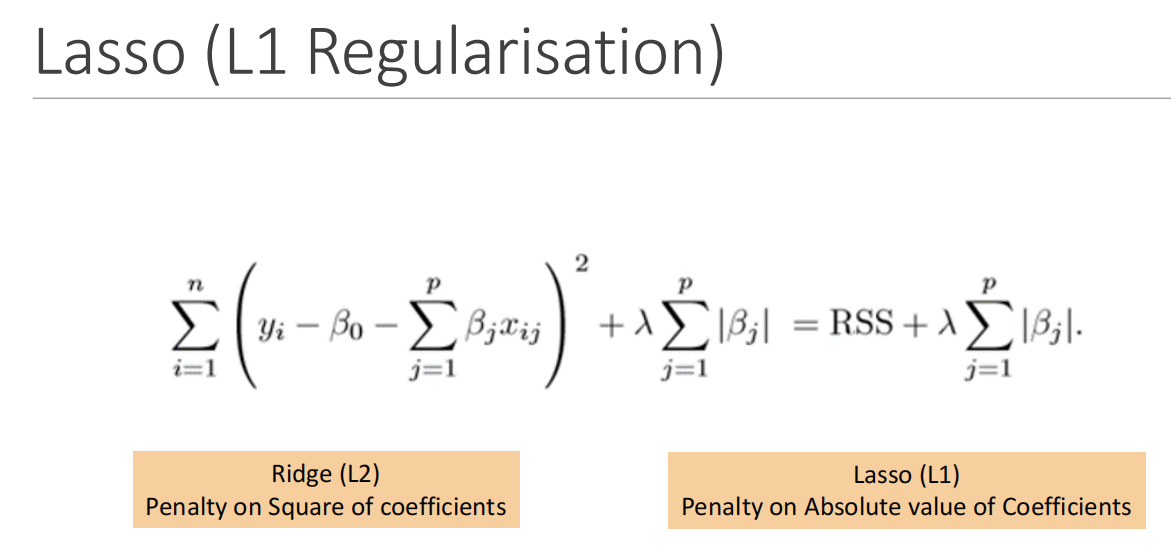

### Step 1 - Read Dataset

In [1]:
import pandas as pd
df = pd.read_csv('Cars93.csv',na_values=['','NA'],keep_default_na=False)
df.head()

C:\Users\ankit\AppData\Local\Temp\ipykernel_22296\1864726582.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Step 2 - Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [3]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
m = df.isna().sum()
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3 -  Separate X and Y

In [7]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

### Step 4 -Apply Preprocessing in X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [11]:
# Separate cat and cont vars
cat = list(X.columns[X.dtypes == 'object'])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [12]:
cont = list(X.columns[X.dtypes != 'object'])
cont

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())])

In [14]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num',num_pipe,cont),
                        ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [19]:
 pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5 - Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [22]:
xtest.shape

(19, 257)

In [23]:
ytest.shape

(19, 1)

### Step 6 - Start building the models

In [25]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain,ytrain)


LinearRegression()

In [28]:
model1.score(xtrain,ytrain)

1.0

In [29]:
model1.score(xtest,ytest)

0.9334738752287425

In [30]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1)
model2.fit(xtrain,ytrain)

Ridge(alpha=1)

In [31]:
model2.score(xtrain,ytrain)

0.9977394680388765

In [32]:
model2.score(xtest,ytest)

0.9335286638392862

In [39]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=4)
model3.fit(xtrain,ytrain)

Lasso(alpha=4)

In [40]:
model3.score(xtrain,ytrain)

0.9712236933499798

In [41]:
model3.score(xtest,ytest)

0.9136846896429055

### Step 7 - Hyperparameter tunning - GridSearchCV
alpha - Hyperparameter


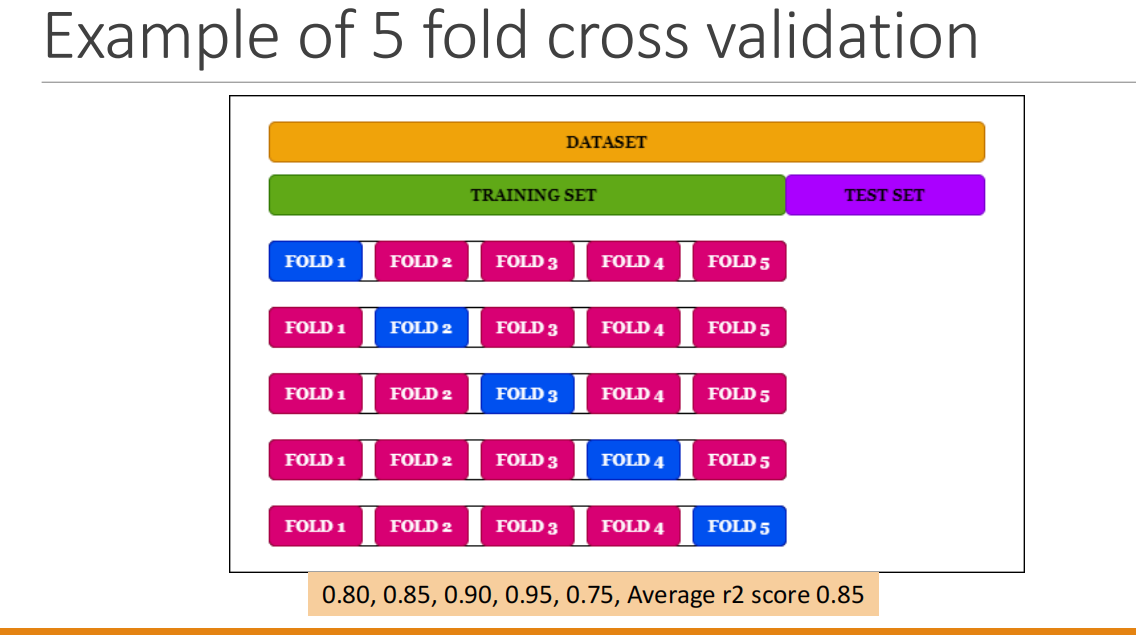

In [56]:
import numpy as np
params = {'alpha' : np.arange(start=0.1,stop=100,step=0.01)}

In [57]:
params

{'alpha': array([ 0.1 ,  0.11,  0.12, ..., 99.97, 99.98, 99.99])}

In [60]:
# Tuning for ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
gscv1 = GridSearchCV(estimator=rr,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [64]:
gscv1.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1 ,  0.11,  0.12, ..., 99.97, 99.98, 99.99])},
             scoring='neg_mean_squared_error')

In [65]:
gscv1.score(xtrain,ytrain)

-6180.624900250365

In [66]:
gscv1.score(xtest,ytest)

-24186.137861621024

In [67]:
gscv1.best_params_

{'alpha': 7.649999999999996}

In [68]:
gscv1.best_score_

-22627.52209083903

In [69]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=7.649999999999996)

In [70]:
best_ridge.score(xtrain,ytrain)

0.9816255767434787

In [71]:
best_ridge.score(xtest,ytest)

0.9333158504154382

In [73]:
# Tuning for Lasso
ls = Lasso()
gscv2 = GridSearchCV(estimator= ls, param_grid=params,cv = 5 , scoring= 'neg_mean_squared_error')


In [74]:
gscv2.fit(xtrain,ytrain)

d:\Ankit\kubernetes\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+04, tolerance: 2.079e+03
  model = cd_fast.enet_coordinate_descent(
d:\Ankit\kubernetes\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.144e+03, tolerance: 1.734e+03
  model = cd_fast.enet_coordinate_descent(
d:\Ankit\kubernetes\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1 ,  0.11,  0.12, ..., 99.97, 99.98, 99.99])},
             scoring='neg_mean_squared_error')

In [75]:
gscv2.best_params_

{'alpha': 8.389999999999995}

In [76]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=8.389999999999995)

In [77]:
best_lasso.score(xtrain,ytrain)

0.962988303638047

In [78]:
best_lasso.score(xtest,ytest)

0.9023140647656378

In [79]:
gscv2.best_score_

-18150.678090204317

### Crossvalidation r2 scores

In [88]:
from sklearn.model_selection import cross_val_score
scores_ridge = cross_val_score( best_ridge,xtrain ,ytrain , cv=5,scoring='r2')

In [89]:
scores_ridge

array([0.95339755, 0.92678713, 0.96297015, 0.90066764, 0.90612702])

In [90]:
scores_ridge.mean()

0.9299898956063236

In [91]:
scores_lasso = cross_val_score(best_lasso,xtrain,ytrain,cv=5,scoring='r2')
scores_lasso

array([0.96543423, 0.93504549, 0.97184633, 0.92718347, 0.92608598])

In [92]:
scores_lasso.mean()

0.945119099980519